In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization,Dropout,Flatten,Conv2D,MaxPooling2D
from sklearn.model_selection import train_test_split
import cv2
import zipfile
import os
from matplotlib import pyplot as plt
import random as rand
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
with zipfile.ZipFile('/content/drive/My Drive/chest_xray.zip','r') as zip_file:
  zip_file.extractall('')

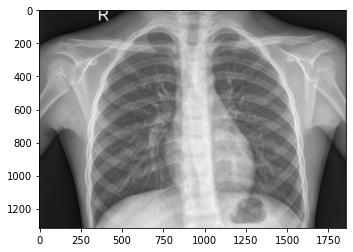

In [3]:
img = plt.imread('/content/chest_xray/test/NORMAL/IM-0001-0001.jpeg')
plt.imshow(img,cmap='gray')
plt.show()

Loading the data


In [4]:
train_normal = os.listdir('/content/chest_xray/train/NORMAL')
train_pneumo = os.listdir('/content/chest_xray/train/PNEUMONIA')
test_normal = os.listdir('/content/chest_xray/test/NORMAL')
test_pneumo = os.listdir('/content/chest_xray/test/PNEUMONIA')


In [5]:
len(train_pneumo)

3876

In [6]:
train_data= []
for i in train_normal:
  train_data.append([i,0])
for i in train_pneumo:
  train_data.append([i,1])



In [7]:
test_data= []
for i in test_normal:
  test_data.append([i,0])
for i in test_pneumo:
  test_data.append([i,1])


In [8]:
len(train_data)

5218

In [9]:

len(test_data)

624

In [10]:
#shuffling the data
rand.shuffle(train_data)
rand.shuffle(test_data)

In [11]:
#creating a dataframe
train_data = pd.DataFrame(train_data , columns = ['images','label'])
test_data = pd.DataFrame(test_data, columns = ['images','label'])


In [12]:
train_data.head()

,images,label
0,person1362_virus_2345.jpeg,1
1,person1438_bacteria_3715.jpeg,1
2,IM-0545-0001-0002.jpeg,0
3,NORMAL2-IM-1349-0001.jpeg,0
4,person1141_virus_1886.jpeg,1


In [13]:
train_data['images']

0          person1362_virus_2345.jpeg
1       person1438_bacteria_3715.jpeg
2              IM-0545-0001-0002.jpeg
3           NORMAL2-IM-1349-0001.jpeg
4          person1141_virus_1886.jpeg
                    ...              
5213     person321_bacteria_1484.jpeg
5214                IM-0625-0001.jpeg
5215                IM-0557-0001.jpeg
5216        NORMAL2-IM-0887-0001.jpeg
5217    person1474_bacteria_3837.jpeg
Name: images, Length: 5218, dtype: object

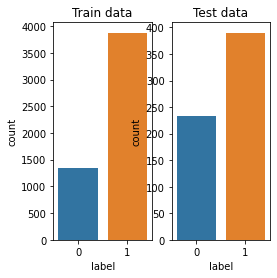

In [14]:
#plotting the labels of train and test
plt.subplot(1,3,1)
sns.countplot(train_data['label'])
plt.title('Train data')

plt.subplot(1,3,2)
sns.countplot(test_data['label'])
plt.title('Test data')

plt.show()

Loading the images for training


In [ ]:
x = []
y = []
for i in range(len(train_normal)):
  try:
    img = cv2.imread('/content/chest_xray/train/NORMAL/' + train_normal[i])
    img = cv2.resize(img,(256,256))
    x.append(img)
    y.append(1)
  except:
    pass

In [ ]:
for i in range(len(train_pneumo)):
  try:
    img = cv2.imread('/content/chest_xray/train/PNEUMONIA/' + train_pneumo[i])
    img = cv2.resize(img,(256,256))
    x.append(img)
    y.append(0)
  except:
    pass

In [ ]:
len(x)

5216

In [ ]:
x[1].shape

(256, 256, 3)

Loading the images for testing 

In [ ]:
x1 = []
y1 = []
for i in range(len(test_normal)):
  try:
    img = cv2.imread('/content/chest_xray/test/NORMAL/' + test_normal[i])
    img = cv2.resize(img,(256,256))
    x1.append(img)
    y1.append(1)
  except:
    pass

In [ ]:
for i in range(len(test_pneumo)):
  try:
    img = cv2.imread('/content/chest_xray/test/PNEUMONIA/' + test_pneumo[i])
    img = cv2.resize(img,(256,256))
    x1.append(img)
    y1.append(0)
  except:
    pass

In [ ]:
# converting our features to array
x = np.array(x)
x1 = np.array(x1)

In [ ]:
#converting our train data images to grayscale
x_train_grayscale = np.zeros(x.shape[:-1])
for i in range(x.shape[0]): 
    x_train_grayscale[i] = cv2.cvtColor(x[i], cv2.COLOR_BGR2GRAY)

In [ ]:
#converting our test data images to grayscale
x_test_grayscale = np.zeros(x1.shape[:-1])
for i in range(x1.shape[0]):
   x_test_grayscale[i] = cv2.cvtColor(x1[i], cv2.COLOR_BGR2GRAY)

In [ ]:
#reshape our data to 4dim for our neural network model input
x_train_grayscale = x_train_grayscale.reshape(x_train_grayscale.shape[0],256,256,1)

In [ ]:
x_test_grayscale = x_test_grayscale.reshape(x_test_grayscale.shape[0],256,256,1)

Normalising our features

In [ ]:
x_train_grayscale= x_train_grayscale/255
x_test_grayscale = x_test_grayscale/255



converting our label to array format 

In [ ]:
y = np.array(y)
y1 = np.array(y1)

Building a Convnet model

In [ ]:
model = Sequential()

In [ ]:

model.add(Conv2D(32, (3,3), activation="relu",input_shape=(256,256,1)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(2,2))

In [ ]:
#model.add(Flatten())
#model.add(Dense(128,activation='relu'))
#model.add(Dense(128,activation='relu'))

#model.add(Dense(256,activation='relu'))

#model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
#model.add(BatchNormalization())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))

#model.add(Dense(256,activation='relu'))
#model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 246016)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                15745088  
_________________________________________________________________
dropout (Dropout)            (None, 64)                0

In [ ]:
model.compile(loss = 'binary_crossentropy',optimizer='adam',metrics = ['accuracy'])

In [ ]:
#fitting our model
model.fit(x_train_grayscale,y,batch_size= 50,epochs =10)

Epoch 1/10
105/105 [==============================] - 16s 150ms/step - loss: 0.3374 - accuracy: 0.8491
Epoch 2/10
105/105 [==============================] - 15s 147ms/step - loss: 0.1472 - accuracy: 0.9442
Epoch 3/10
105/105 [==============================] - 15s 147ms/step - loss: 0.1186 - accuracy: 0.9595
Epoch 4/10
105/105 [==============================] - 15s 146ms/step - loss: 0.0881 - accuracy: 0.9726
Epoch 5/10
105/105 [==============================] - 15s 147ms/step - loss: 0.0759 - accuracy: 0.9743
Epoch 6/10
105/105 [==============================] - 15s 147ms/step - loss: 0.0591 - accuracy: 0.9797
Epoch 7/10
105/105 [==============================] - 15s 147ms/step - loss: 0.0706 - accuracy: 0.9737
Epoch 8/10
105/105 [==============================] - 15s 146ms/step - loss: 0.0532 - accuracy: 0.9829
Epoch 9/10
105/105 [==============================] - 15s 146ms/step - loss: 0.0459 - accuracy: 0.9839
Epoch 10/10
105/105 [==============================] - 15s 146ms/step - l

In [ ]:
loss, accuracy = model.evaluate(x_test_grayscale,y1)

20/20 [==============================] - 1s 39ms/step - loss: 1.9227 - accuracy: 0.7596


In [ ]:
accuracy

0.7596153616905212